<a href="https://colab.research.google.com/github/ravitejap461/data-portfolio/blob/main/agentic-workflow-designer/agentic_customer_queries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Sample dataset of queries
data = [
    {"Name": "Amit", "Query": "Where is my order?"},
    {"Name": "Sara", "Query": "I want to return a damaged product."},
    {"Name": "Ravi", "Query": "How do I earn loyalty points?"},
    {"Name": "Priya", "Query": "App keeps crashing every time I try to log in."},
    {"Name": "David", "Query": "Why is this product not available in my area?"},
    {"Name": "Maya", "Query": "My refund is delayed."},
    {"Name": "John", "Query": "Can I change my delivery address?"},
    {"Name": "Tina", "Query": "The product description is misleading."},
    {"Name": "Ali", "Query": "I forgot my password. How do I reset it?"},
    {"Name": "Megha", "Query": "Can I speak to someone about a feature request?"}
]

df = pd.DataFrame(data)
df.head()


,Name,Query
0,Amit,Where is my order?
1,Sara,I want to return a damaged product.
2,Ravi,How do I earn loyalty points?
3,Priya,App keeps crashing every time I try to log in.
4,David,Why is this product not available in my area?


In [2]:
def simulate_llm_qualification(row):
    query = row['Query'].lower()

    if "refund" in query or "return" in query:
        category = "Returns & Refunds"
        needs_human = True
        response = "We'll escalate your refund delay to our support team immediately."
    elif "order" in query or "delivery" in query:
        category = "Delivery"
        needs_human = False
        response = "You can check your order status in the app under 'My Orders'."
    elif "loyalty" in query or "points" in query:
        category = "Loyalty Program"
        needs_human = False
        response = "You earn points on every order. Track them in your Rewards section."
    elif "crash" in query or "bug" in query:
        category = "Technical Issue"
        needs_human = True
        response = "We’ve forwarded your issue to our tech support. They'll get back soon."
    elif "password" in query:
        category = "Account Issue"
        needs_human = False
        response = "Please use 'Forgot Password' on the login page to reset your password."
    elif "feature" in query or "suggest" in query:
        category = "Product Feedback"
        needs_human = True
        response = "Thanks for the suggestion! We've passed it to our product team."
    else:
        category = "General Inquiry"
        needs_human = True
        response = "Your query has been sent to our customer care team."

    return pd.Series([category, needs_human, response])

df[['Category', 'NeedsHuman', 'AutoResponse']] = df.apply(simulate_llm_qualification, axis=1)
df


,Name,Query,Category,NeedsHuman,AutoResponse
0,Amit,Where is my order?,Delivery,False,You can check your order status in the app und...
1,Sara,I want to return a damaged product.,Returns & Refunds,True,We'll escalate your refund delay to our suppor...
2,Ravi,How do I earn loyalty points?,Loyalty Program,False,You earn points on every order. Track them in ...
3,Priya,App keeps crashing every time I try to log in.,Technical Issue,True,We’ve forwarded your issue to our tech support...
4,David,Why is this product not available in my area?,General Inquiry,True,Your query has been sent to our customer care ...
5,Maya,My refund is delayed.,Returns & Refunds,True,We'll escalate your refund delay to our suppor...
6,John,Can I change my delivery address?,Delivery,False,You can check your order status in the app und...
7,Tina,The product description is misleading.,General Inquiry,True,Your query has been sent to our customer care ...
8,Ali,I forgot my password. How do I reset it?,Account Issue,False,Please use 'Forgot Password' on the login page...
9,Megha,Can I speak to someone about a feature request?,Product Feedback,True,Thanks for the suggestion! We've passed it to ...


<Axes: title={'center': 'Query Category Distribution'}, xlabel='Category'>

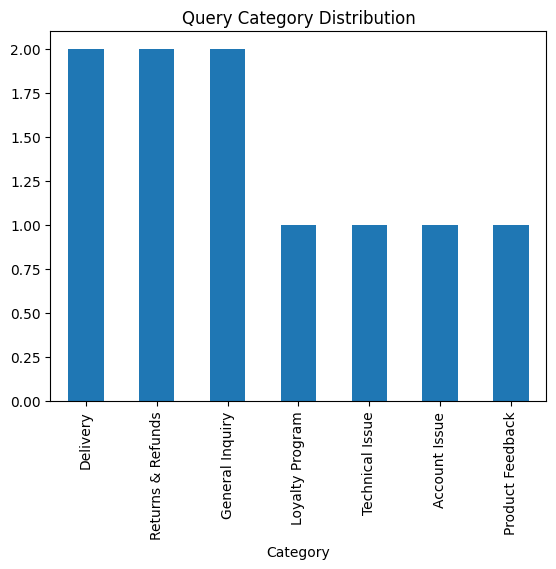

In [3]:
# Distribution of categories
df['Category'].value_counts().plot(kind='bar', title='Query Category Distribution')